<a href="https://colab.research.google.com/github/jjgranadat/Semillero_SOFA/blob/Santiago_V/Tradicional_vs_SVM_16QAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Demodulación

In [ ]:
def demapper_sym(symbols_I, symbols_Q, Ns, threshold = 2.0):
   symbol = []
   for i in range(Ns):
        if symbols_I[i] <= -threshold and symbols_Q[i] >= threshold: #-3+3j
            symbol.append(0)
        elif symbols_I[i] <= -threshold and symbols_Q[i] >= 0 and symbols_Q[i] <= threshold: #-3+1j
            symbol.append(1)
        elif symbols_I[i] <= -threshold and symbols_Q[i] <= 0 and symbols_Q[i] >= -threshold: #-3-j
            symbol.append(3)
        elif symbols_I[i] <= -threshold and symbols_Q[i] <= -threshold: #-3-3j
            symbol.append(2)
        elif symbols_I[i] >= -threshold and symbols_I[i] <= 0 and symbols_Q[i] >= threshold: #-1+3j
            symbol.append(4)
        elif symbols_I[i] >= -threshold and symbols_I[i] <= 0 and symbols_Q[i] >= 0 and symbols_Q[i] <= threshold: #-1+j
            symbol.append(5)
        elif symbols_I[i] >= -threshold and symbols_I[i] <= 0 and symbols_Q[i] <= 0 and symbols_Q[i] >= -threshold: #-1-j
            symbol.append(7)
        elif symbols_I[i] >= -threshold and symbols_I[i] <= 0 and symbols_Q[i] <= -threshold: #-1-3j
            symbol.append(6)
        elif symbols_I[i] >= 0 and symbols_I[i] <= threshold and symbols_Q[i] >= threshold: #1+3j
            symbol.append(12)
        elif symbols_I[i] >= 0 and symbols_I[i] <= threshold and symbols_Q[i] >= 0 and symbols_Q[i] <= threshold: #1+j
            symbol.append(13)
        elif symbols_I[i] >= 0 and symbols_I[i] <= threshold and symbols_Q[i] <= 0 and symbols_Q[i] >= -threshold: #1-j
            symbol.append(15)
        elif symbols_I[i] >= 0 and symbols_I[i] <= threshold and symbols_Q[i] <= -threshold: #1-3j
            symbol.append(14)
        elif symbols_I[i] >= threshold and symbols_Q[i] >= threshold: #3+3j
            symbol.append(8)
        elif symbols_I[i] >= threshold and symbols_Q[i] >= 0 and symbols_Q[i] <= threshold: #3+1j
            symbol.append(9)
        elif symbols_I[i] >= threshold and symbols_Q[i] <= 0 and symbols_Q[i] >= -threshold: #3-1j
            symbol.append(11)
        elif symbols_I[i] >= threshold and symbols_Q[i] <= -threshold: #3-3j
            symbol.append(10)
   return(symbol)

In [ ]:
def SER_f(sym_rx, Symbols_tx, Ns):
    error = 0
    for i in range(Ns):
        if sym_rx[i] == Symbols_tx[i]:
            error = error
        else:
            error= error + 1
    SER = error/Ns
    return([SER, error])

# Generación y modulación

In [ ]:
Ns= 10000
Mod=16 #16QAM
Symbols_tx = np.random.randint(Mod, size=Ns)
df_sym_tx= pd.DataFrame(Symbols_tx)
print(Symbols_tx[0:10])

[12  9 13 15  7  6  6 15 14 14]


### Conversor binario decimal


In [ ]:
def binarizar(decimal):
  #Convierte decimal a binario.
    binario = ''
    while decimal // 2 != 0:
        binario = str(decimal % 2) + binario
        decimal = decimal // 2
    return str(decimal) + binario

cad = ''
for l in Symbols_tx:
    cad +=binarizar(l)
print(cad)

In [ ]:
mod_dict = {0:-3+3j, #0000
            1:-3+1j, #0001
            2:-3-3j, #0010
            3:-3-1j, #0011
            4:-1+3j, #0100
            5:-1+1j, #0101
            6:-1-3j, #0110
            7:-1-1j, #0111
            8:3+3j, #1000
            9:3+1j, #1001
            10:3-3j, #1010
            11:3-1j, #1011
            12:1+3j, #1100
            13:1+1j, #1101
            14:1-3j, #1110
            15:1-1j} #1111

In [ ]:
#Modulación reemplazando símbolos por valores complejos - mapeo (opción 2)
df_sym_mod2 = df_sym_tx.iloc[:,0].map(mod_dict)
df_sym_mod2.head(20)

0     1.0+3.0j
1     3.0+1.0j
2     1.0+1.0j
3     1.0-1.0j
4    -1.0-1.0j
5    -1.0-3.0j
6    -1.0-3.0j
7     1.0-1.0j
8     1.0-3.0j
9     1.0-3.0j
10    3.0+1.0j
11    1.0-1.0j
12    3.0+3.0j
13   -3.0+1.0j
14   -1.0+1.0j
15   -3.0-1.0j
16    1.0-1.0j
17   -1.0-1.0j
18    1.0-3.0j
19   -1.0+3.0j
Name: 0, dtype: complex128

# Transmisión canal AWGN

In [ ]:
Xr = np.real(df_sym_mod2)
Xi = np.imag(df_sym_mod2)

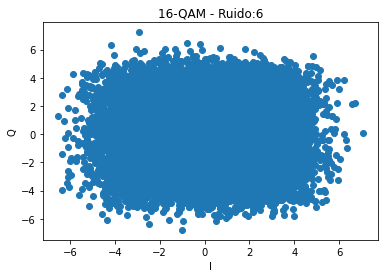

Fitting 5 folds for each of 25 candidates, totalling 125 fits
{'C': 10, 'gamma': 0.001}
SVC(C=10, gamma=0.001)


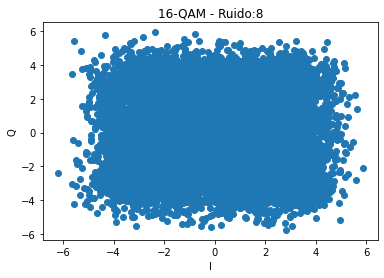

Fitting 5 folds for each of 25 candidates, totalling 125 fits
{'C': 10, 'gamma': 0.01}
SVC(C=10, gamma=0.01)


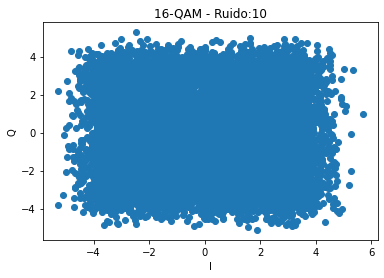

Fitting 5 folds for each of 25 candidates, totalling 125 fits
{'C': 0.1, 'gamma': 0.1}
SVC(C=0.1, gamma=0.1)


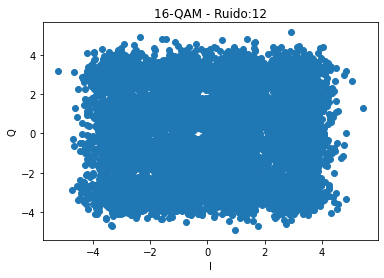

Fitting 5 folds for each of 25 candidates, totalling 125 fits
{'C': 1, 'gamma': 0.001}
SVC(C=1, gamma=0.001)


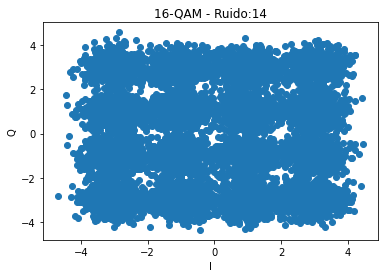

Fitting 5 folds for each of 25 candidates, totalling 125 fits
{'C': 1000, 'gamma': 0.001}
SVC(C=1000, gamma=0.001)


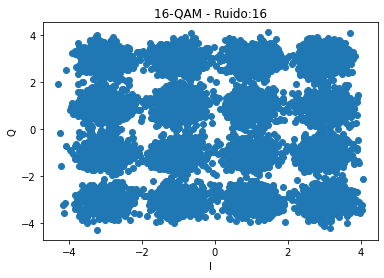

Fitting 5 folds for each of 25 candidates, totalling 125 fits
{'C': 0.1, 'gamma': 0.1}
SVC(C=0.1, gamma=0.1)


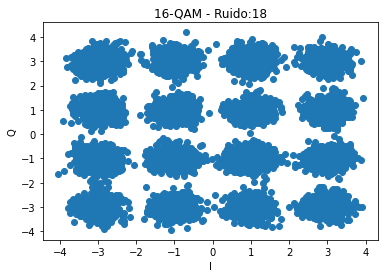

Fitting 5 folds for each of 25 candidates, totalling 125 fits
{'C': 0.1, 'gamma': 0.1}
SVC(C=0.1, gamma=0.1)


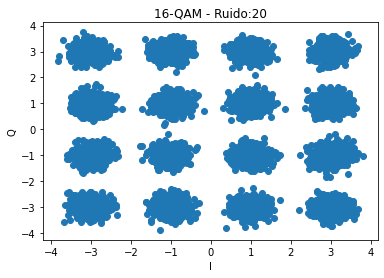

Fitting 5 folds for each of 25 candidates, totalling 125 fits
{'C': 0.1, 'gamma': 1}
SVC(C=0.1, gamma=1)
{6: {'C': 10, 'gamma': 0.001}, 8: {'C': 10, 'gamma': 0.01}, 10: {'C': 0.1, 'gamma': 0.1}, 12: {'C': 1, 'gamma': 0.001}, 14: {'C': 1000, 'gamma': 0.001}, 16: {'C': 0.1, 'gamma': 0.1}, 18: {'C': 0.1, 'gamma': 0.1}, 20: {'C': 0.1, 'gamma': 1}}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: RuntimeWarning: divide by zero encountered in log10


In [ ]:
# Adición de ruido blanco Gaussiano (AWGN)
l_snr = []
dem_trad =[]
dem_svm=[]
b_param = {}
for c in range(6,22,2):
  target_snr_db = c
  Xr_avg_p = np.mean(Xr**2)
  Xr_avg_db = 10 * np.log10(Xr_avg_p)
  #print(Xr_avg_db)
  noise_avg_db_r = Xr_avg_db - target_snr_db
  noise_avg_p_r = 10 ** (noise_avg_db_r / 10)
  mean_noise = 0
  noise_r = np.random.normal(mean_noise, np.sqrt(noise_avg_p_r), len(Xr))
  Xr_ch = Xr + noise_r

  Xi_avg_p = np.mean(Xi**2)
  Xi_avg_db = 10 * np.log10(Xi_avg_p)
  #print(Xi_avg_db)
  noise_avg_db_i = Xr_avg_db - target_snr_db
  noise_avg_p_i = 10 ** (noise_avg_db_i / 10)
  noise_i = np.random.normal(mean_noise, np.sqrt(noise_avg_p_i), len(Xi))
  Xi_ch = Xi + noise_i

  #----------------

  plt.plot(Xi_ch, Xr_ch, 'o')
  plt.xlabel('I')
  plt.ylabel('Q')
  plt.title('16-QAM - Ruido:'+str(c))
  plt.show()

  sym_rx= demapper_sym(Xr_ch, Xi_ch, len(Xr_ch), threshold = 2.0)

  #-----------------------SIN SVM------------------------
  SER, error = SER_f(sym_rx[:int(len(sym_rx)*.3)], Symbols_tx[:int(len(Symbols_tx)*.3)], int(Ns*.3))
  #print("-----  SIN SVM   ----","\n'Ruido: '",c)
  #print("SER sin SVM....."+str(SER))
  #print("#Errores....."+str(error))

  #-----------------------USANDO SVM------------------
  #print("-----  CON SVM   ----")
  X = np.transpose(np.array([Xr_ch,Xi_ch]))
  y= Symbols_tx

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training & 30% test

  model = SVC()
  model.fit(X_train, y_train)

  model.score(X_train, y_train)

  y_pred = model.predict(X_test)

  #print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

  param_grid = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01, 0.001, 0.0001]}

  grid = GridSearchCV(SVC(), param_grid, verbose = 1)

  grid.fit(X_train, y_train)

  grid.best_params_
  print(grid.best_params_)

  grid.best_estimator_
  print(grid.best_estimator_)

  grid_pred = grid.predict(X_test)

  #print("Accuracy FINAL:",metrics.accuracy_score(y_test, grid_pred))

  SER_test, error_test = SER_f(y_pred, y_test, len(y_pred))
  #print(SER_test)
  #print(error_test)

  l_snr.append(c)
  dem_trad.append(np.log10(SER))
  dem_svm.append(np.log10(SER_test))
  b_param[c]=grid.best_params_
print(b_param)

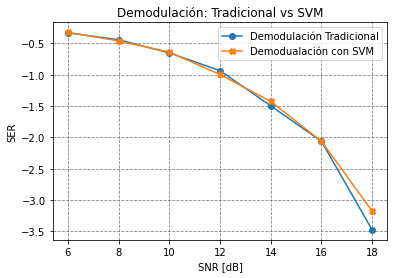

In [ ]:
fig, ax = plt.subplots()
dem = {"trad":dem_trad,"dem_svm":dem_svm}
ax.plot(l_snr,dem_trad, label = "Demodulación Tradicional", marker = 'o')
ax.plot(l_snr,dem_svm, label ="Demodualación con SVM", marker = 'X')
ax.legend(loc='upper right')
ax.grid(axis = 'both', color = 'gray', linestyle = 'dashed')
ax.set_title("Demodulación: Tradicional vs SVM")
ax.set_xlabel("SNR [dB]")
ax.set_ylabel("SER")
plt.show()

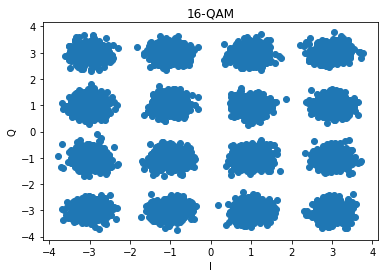

In [ ]:
plt.plot(Xi_ch, Xr_ch, 'o')
plt.xlabel('I')
plt.ylabel('Q')
plt.title('16-QAM')
plt.show()

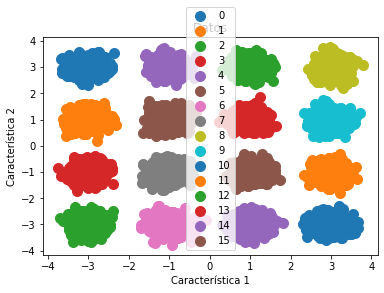

In [ ]:
fig, ax = plt.subplots()
for g in np.unique(Symbols_tx):
    ix = np.where(Symbols_tx == g)
    ax.scatter(Xr_ch[ix], Xi_ch[ix], label = g, s = 100)
ax.legend()
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Datos')
plt.show()

In [ ]:
sym_rx= demapper_sym(Xr_ch, Xi_ch, len(Xr_ch), threshold = 2.0)
print(sym_rx[0:10])

[8, 15, 15, 3, 6, 0, 7, 14, 0, 6]


In [ ]:
SER, error = SER_f(sym_rx, Symbols_tx, Ns)
print(SER)
print(error)

0.0
0


# Demodulación usando SVM


In [ ]:
X = np.transpose(np.array([Xr_ch,Xi_ch]))
y= Symbols_tx

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training & 30% test

In [ ]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
model.score(X_train, y_train)

1.0

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
param_grid = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01, 0.001, 0.0001]}

In [ ]:
grid = GridSearchCV(SVC(), param_grid, verbose = 1)

In [ ]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=1)

In [ ]:
grid.best_params_

{'C': 0.1, 'gamma': 1}

In [ ]:
grid.best_estimator_

SVC(C=0.1, gamma=1)

In [ ]:
grid_pred = grid.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, grid_pred))

Accuracy: 1.0
